# DADOS DO PODER JUDICIÁRIO

**Objetivo:** Demonstração dos dados de atos judiciais publicados no Diário da Justiça Eletrônico Nacional - DJEN, plataforma mantida pelo Conselho Nacional de Justiça - CNJ.

**Delimitação dos dados:** Publicações da 1ª a 7ª Vara da Fazenda Pública da Capital do Estado do Maranhão, no período de 01/01/2021 a 31/12/2021.

## Bibliotecas e funções auxiliares

In [17]:
# Importando bibliotecas
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

def jupyter_settings():
    %matplotlib inline 
    %pylab inline
    plt.rcParams['figure.figsize']=[20,10]
    plt.rcParams['font.size']=10
    sns.set_style('darkgrid')
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Função para coleta de dados via requisisção da API do Diário da Justiça Nacional
# relativo às 7 Varas de Fazenda de São Luis/MA

def requisicao_api_djen_tjma_1a7varasfazenda( data_inicio, data_fim ):
    
    # Parâmetros da requisição
    url_api = 'https://comunicaapi.pje.jus.br/api/v1/comunicacao'
    tribunal = 'TJMA'
    codigo_orgao = [739,481,486,483,699,660,572] # 1ª a 7ª Varas de Fazenda de São Luis/MA
    data_inicio = data_inicio
    data_fim = data_fim
    
    # Inicialização de listas de variáveis para armazenamento dos dados JSON da requisição
    ids = []
    data_disponibilizacao = []
    sigla_tribunal = []
    orgao_julgador = []
    tipo_comunicacao = []
    tipo_documento = []
    meio = []
    meio_completo = []
    numero_processo = []
    nome_classe = []
    codigo_classe = []
    numero_comunicacao = []
    ativo = []
    destinatarios = []
    nome_destinatarios = []
    advogados = []
    nome_advogados = []
    numero_oab = []
    uf_oab = []
    texto = []
    
    # Loop para requisição e extração dos dados
    for orgao in codigo_orgao:
        pagina = 0
        while True:
            parametros = {'pagina' : pagina,
                          'itensPorPagina' : 100,
                          'siglaTribunal' : tribunal,
                          'orgaoId' : orgao,
                          'dataDisponibilizacaoInicio' : data_inicio,
                          'dataDisponibilizacaoFim' : data_fim}
            response = requests.get( url_api, params=parametros )
            json_data = json.loads(response.text)
        
            # Se o nº de publicações da página for 0, então encerra requisição. 
            if json_data['count'] == 0:
                break
            
            # Se o nº de publicações da página for diferente de 0, então coleta-se os dados.
            for x in json_data['items']:
                ids.append(x['id'])
                data_disponibilizacao.append(x['data_disponibilizacao'])
                sigla_tribunal.append(x['siglaTribunal'])
                orgao_julgador.append(x['nomeOrgao'])
                tipo_comunicacao.append(x['tipoComunicacao'])
                tipo_documento.append(x['tipoDocumento'])
                meio.append(x['meio'])
                meio_completo.append(x['meiocompleto'])
                numero_processo.append(x['numero_processo'])
                nome_classe.append(x['nomeClasse'])
                codigo_classe.append(x['codigoClasse'])
                numero_comunicacao.append(x['numeroComunicacao'])
                ativo.append(x['ativo'])
                destinatarios.append(x['destinatarios'])        
                advogados.append(x['destinatarioadvogados'])
                texto.append(x['texto'])
        
            # Incremento da paginação para o próximo loop
            pagina = pagina + 1
    
    # Percorrendo 'destinatarios' para extração apenas do nome dos destinatários
    for i in destinatarios:
        aux = [ j['nome'] for j in i ]
        nome_destinatarios.append(aux) 
    
    # Percorrendo 'advogados' para extração do nome, oab e uf dos advogados
    for i in advogados:
        aux = [ j['advogado']['nome'] for j in i ]
        nome_advogados.append(aux)
        aux = [ j['advogado']['numero_oab'] for j in i ]
        numero_oab.append(aux)
        aux = [ j['advogado']['uf_oab'] for j in i ]
        uf_oab.append(aux)    
    
    # Construção do DataFrame com dados armazenados nas listas de variáveis.
    df_raw = pd.DataFrame(list(zip(ids, data_disponibilizacao, sigla_tribunal, orgao_julgador, 
                                   tipo_comunicacao, tipo_documento, meio, meio_completo, numero_processo,
                                   nome_classe, codigo_classe, numero_comunicacao, ativo, nome_destinatarios,
                                   nome_advogados, numero_oab, uf_oab, texto)), 
                      columns = ['ids', 'data_disponibilizacao', 'sigla_tribunal', 'orgao_julgador',
                                 'tipo_comunicacao','tipo_documento', 'meio', 'meio_completo', 'numero_processo',
                                 'nome_classe','codigo_classe', 'numero_comunicacao', 'ativo', 'nome_destinatarios',
                                 'nome_advogados', 'numero_oab', 'uf_oab', 'texto'])

    # Limpeza inicial de dados obtidos no formato de listas para string
    df_raw['nome_destinatarios'] = df_raw['nome_destinatarios'].apply(lambda x: ', '.join(x))
    df_raw['nome_advogados']     = df_raw['nome_advogados'].apply(lambda x: ', '.join(x))
    df_raw['numero_oab']         = df_raw['numero_oab'].apply(lambda x: ', '.join(x))
    df_raw['uf_oab']             = df_raw['uf_oab'].apply(lambda x: ', '.join(x))
    
    # A função retorna um DataFrame com os dados coletados e tratados
    return df_raw

## Coleta de dados da API

In [4]:
# Coleta de dados usando a função criada
df_raw = requisicao_api_djen_tjma_1a7varasfazenda( '2021-01-01', '2021-12-31' )

# Salvando DataFrame em arquivo csv
df_raw.to_csv('dados_djen_varasfazenda1a7_raw.csv', index=False)

# Exibindo DataFrame
df_raw

,ids,data_disponibilizacao,sigla_tribunal,orgao_julgador,tipo_comunicacao,tipo_documento,meio,meio_completo,numero_processo,nome_classe,codigo_classe,numero_comunicacao,ativo,nome_destinatarios,nome_advogados,numero_oab,uf_oab,texto
0,13572921,2021-12-28,TJMA,1ª Vara da Fazenda Pública de São Luís,Intimação,Intimação,D,Diário Eletrônico de Justiça Nacional,00446315620128100001,PROCEDIMENTO COMUM CíVEL,7,6,True,WELLINGTON VAGNER BRAGA CARDOSO,NATALIA FERNANDES DE RESENDE,9553,MA,PROCESSO Nº. 0044631-56.2012.8.10.0001 AUTOR: ...
1,13573180,2021-12-28,TJMA,1ª Vara da Fazenda Pública de São Luís,Intimação,Intimação,D,Diário Eletrônico de Justiça Nacional,08261783820168100001,CUMPRIMENTO DE SENTENçA,156,31,True,LUIZ HENRIQUE FALCAO TEIXEIRA,"LUIZ HENRIQUE FALCAO TEIXEIRA, THIAGO HENRIQUE...","3827, 10012","MA, MA",PROCESSO: 0826178-38.2016.8.10.0001 AUTOR: LUI...
2,13442614,2021-12-17,TJMA,1ª Vara da Fazenda Pública de São Luís,Intimação,Intimação,D,Diário Eletrônico de Justiça Nacional,08250837020168100001,CUMPRIMENTO DE SENTENçA,156,3435,True,LUIZ HENRIQUE FALCAO TEIXEIRA,JOSE HELIAS SEKEFF DO LAGO,7744,MA,PROCESSO: 0825083-70.2016.8.10.0001 AUTOR: LUI...
3,13442832,2021-12-17,TJMA,1ª Vara da Fazenda Pública de São Luís,Intimação,Intimação,D,Diário Eletrônico de Justiça Nacional,08293923720168100001,CUMPRIMENTO DE SENTENçA,156,3514,True,LUIZ HENRIQUE FALCAO TEIXEIRA,FREDERICO DE ABREU SILVA CAMPOS,12425,MA,PROCESSO: 0829392-37.2016.8.10.0001 AUTOR: LUI...
4,13442907,2021-12-17,TJMA,1ª Vara da Fazenda Pública de São Luís,Intimação,Intimação,D,Diário Eletrônico de Justiça Nacional,08170673020168100001,CUMPRIMENTO DE SENTENçA,156,3540,True,LUIZ HENRIQUE FALCAO TEIXEIRA,POLLYANNA SILVA FREIRE LAUANDE,7612,MA,PROCESSO: 0817067-30.2016.8.10.0001 AUTOR: LUI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46681,31878,2021-01-08,TJMA,7ª Vara da Fazenda Pública de São Luís,Intimação,Despacho (expediente),D,Diário Eletrônico de Justiça Nacional,08021361720198100001,PROCEDIMENTO COMUM CíVEL,7,1703,True,KARLA MARA BARBOSA BARROS,ROBERTH WILLIAM BRITO,8407,MA,PROCESSO Nº 0802136-17.2019.8.10.0001 AUTOR: K...
46682,31893,2021-01-08,TJMA,7ª Vara da Fazenda Pública de São Luís,Intimação,Despacho (expediente),D,Diário Eletrônico de Justiça Nacional,08101265920198100001,MANDADO DE SEGURANçA CíVEL,120,1706,True,TACIO ROBERT MENDONCA DE ARAUJO,"MARIA ANTONIA MOREIRA DOS SANTOS, ANNA KARINA ...","17049, 8632, 20414","MA, MA, MA",PROCESSO Nº 0810126-59.2019.8.10.0001 AUTOR: T...
46683,31930,2021-01-08,TJMA,7ª Vara da Fazenda Pública de São Luís,Intimação,Despacho (expediente),D,Diário Eletrônico de Justiça Nacional,08383767320178100001,PROCEDIMENTO COMUM CíVEL,7,1708,True,ALCIDES DE SOUSA COELHO NETO,NATHALIA DE MELO MOREIRA,10893,MA,PROCESSO Nº 0838376-73.2017.8.10.0001 AUTOR: A...
46684,32395,2021-01-08,TJMA,7ª Vara da Fazenda Pública de São Luís,Intimação,Intimação,D,Diário Eletrônico de Justiça Nacional,08642701720188100001,CUMPRIMENTO DE SENTENçA,156,1716,True,MARCIA CRISTINE PENHA RAPOSO,PAULO ROBERTO COSTA MIRANDA,765,MA,ESTADO DO MARANHÃO PODER JUDICIÁRIO COMARCA DA...


## Limpeza dos dados

In [5]:
df1 = df_raw.copy()

In [6]:
# Checando dados
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686 entries, 0 to 46685
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    46686 non-null  int64 
 1   data_disponibilizacao  46686 non-null  object
 2   sigla_tribunal         46686 non-null  object
 3   orgao_julgador         46686 non-null  object
 4   tipo_comunicacao       46686 non-null  object
 5   tipo_documento         46686 non-null  object
 6   meio                   46686 non-null  object
 7   meio_completo          46686 non-null  object
 8   numero_processo        46686 non-null  object
 9   nome_classe            46686 non-null  object
 10  codigo_classe          46686 non-null  object
 11  numero_comunicacao     46686 non-null  int64 
 12  ativo                  46686 non-null  bool  
 13  nome_destinatarios     46686 non-null  object
 14  nome_advogados         46686 non-null  object
 15  numero_oab         

In [7]:
# Alterando tipos de dados

### 'data_disponibilizacao' para tipo datetime
df1['data_disponibilizacao'] = pd.to_datetime( df1['data_disponibilizacao'])

### Variáveis 'int' para 'string'
df1['ids'] = df1['ids'].astype(str)
df1['numero_processo'] = df1['numero_processo'].astype(str)
df1['codigo_classe'] = df1['codigo_classe'].astype(str)
df1['numero_comunicacao'] = df1['numero_comunicacao'].astype(str)

In [30]:
# Renomeando nome das Varas 'orgao_julgador'
df1['orgao_julgador'] = df2['orgao_julgador'].apply(lambda x: '1ª Vara' if x=='1ª Vara da Fazenda Pública de São Luís' else
                                                    '2ª Vara' if x=='2ª Vara da Fazenda Pública de São Luís' else
                                                    '3ª Vara' if x=='3ª Vara da Fazenda Pública de São Luís' else
                                                    '4ª Vara' if x=='4ª Vara da Fazenda Pública de São Luís' else
                                                    '5ª Vara' if x=='5ª Vara da Fazenda Pública de São Luís' else
                                                    '6ª Vara' if x=='6ª Vara da Fazenda Pública de São Luís' else
                                                    '7ª Vara') 

In [111]:
# Salvando DataFrame em arquivo csv
df1.to_csv('dados_djen_varasfazenda1a7.csv', index=False)

## Análise Exploratória dos Dados

In [4]:
df2 = pd.read_csv('dados_djen_varasfazenda1a7.csv')

In [32]:
df2 = df1.copy()

### 1. Publicações ao longo do tempo

Primeira publicação: 2021-01-08 00:00:00
Última publicação: 2021-12-28 00:00:00


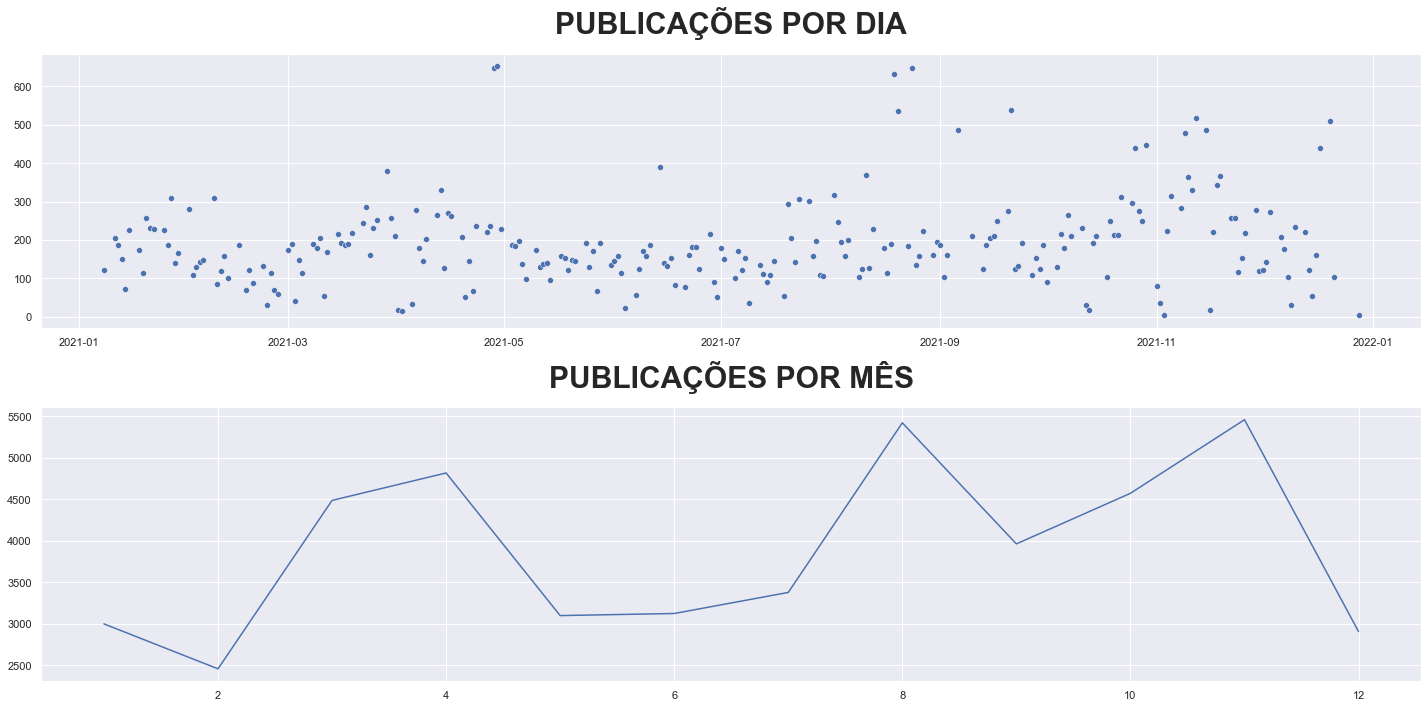

In [114]:
# Data da primeira publicação do ano
print('Primeira publicação: {}'.format(df2['data_disponibilizacao'].min() ) )

# Data da última públicação do ano
print('Última publicação: {}'.format(df2['data_disponibilizacao'].max() ) )

# Visualizando quantidade de publicações ao longo do período

plt.subplot(2, 1, 1)
aux = df2[['data_disponibilizacao', 'ids']].groupby('data_disponibilizacao').count()
sns.scatterplot( x='data_disponibilizacao', y='ids', data=aux )
plt.title('PUBLICAÇÕES POR DIA', fontsize=30, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
df2['data_disponibilizacao_mes'] = df2['data_disponibilizacao'].apply(lambda x: x.month)
aux = df2[['data_disponibilizacao_mes', 'ids']].groupby('data_disponibilizacao_mes').count()
sns.lineplot( x='data_disponibilizacao_mes', y='ids', data=aux )
plt.title('PUBLICAÇÕES POR MÊS', fontsize=30, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

### 2. Publicações por Vara e Classe

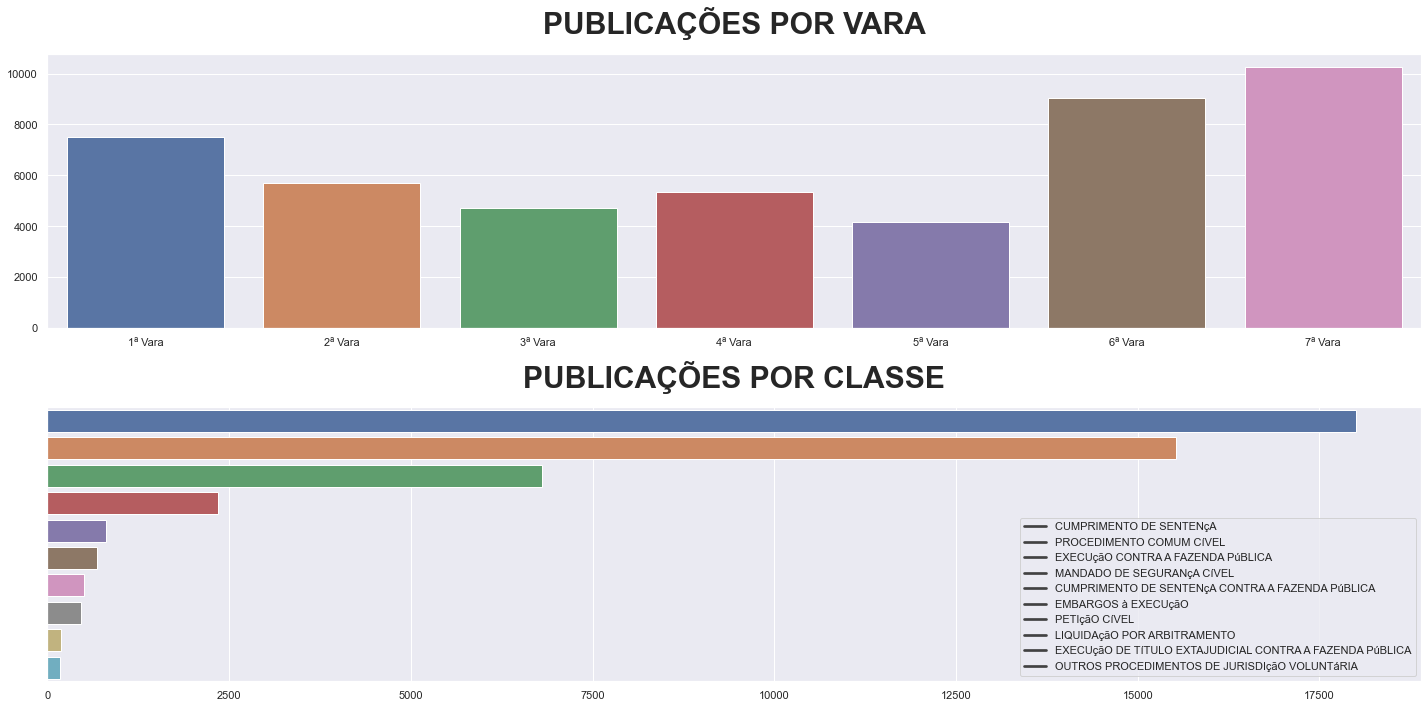

In [116]:
# Publicações por Vara
plt.subplot(2, 1, 1)
sns.countplot( data=df2, x='orgao_julgador' )
plt.title('PUBLICAÇÕES POR VARA', fontsize=30, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')

# Publicações por Classe
plt.subplot(2, 1, 2)
aux = df2[['nome_classe', 'ids']].groupby('nome_classe').count().reset_index().sort_values('ids', ascending=False).head(10)
sns.barplot(data=aux, y='nome_classe', x='ids')
plt.title('PUBLICAÇÕES POR CLASSE', fontsize=30, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
#plt.legend(title='CLASSES', loc='down right', labels=aux['nome_classe'])
#plt.legend(title='CLASSES', loc='best', labels=aux['nome_classe'])
plt.legend(list(aux['nome_classe']), loc='best')
plt.yticks([])
plt.tight_layout()


### 3. Destinatários (10 mais intimados)

In [122]:
df2[['nome_destinatarios', 'ids']].groupby('nome_destinatarios').count().reset_index().sort_values('ids', ascending=False).head(10)

,nome_destinatarios,ids
14076,LUIZ HENRIQUE FALCAO TEIXEIRA,4041
19226,PAULO ROBERTO COSTA MIRANDA,397
21806,SINDICATO DOS SERVIDORES DO MINISTERIO PUBLICO...,367
21799,SINDICATO DOS POLICIAIS CIVIS DO ESTADO DO MAR...,240
19312,PEDRO DUAILIBE MASCARENHAS,236
23072,WAGNER ANTONIO SOUSA DE ARAUJO,136
7417,FERNANDA MEDEIROS PESTANA,118
8868,GUILHERME AUGUSTO SILVA,101
22472,THIAGO HENRIQUE DE SOUSA TEIXEIRA,93
21791,SIND DOS TRAB NO SERV PUBLICO DO ESTADO DO MAR...,89
